## DeepSat (SAT-6) Airborne Dataset Analysis 
+ Purpose is to characterize the DeepSat Data/images into categories accurately
+ First step will be to be able to feed the data into a simple CNN using Batch Normalization and check the performance
+ To download the data from Kaggle

```
cp /notebooks/kaggle.json ~/.kaggle/kaggle.json
Downloading deepsat-sat6.zip to /notebooks
100%|######################################################################################################| 2.42G/2.42G [00:38<00:00, 88.0MB/s]
```

### A little information about the Images present
+ Each sample image is 28x28 pixels and consists of **4 bands - red, green, blue and near infrared**.
+ The training and test labels are one-hot encoded 1x6 vectors
+ The six classes represent the six broad land covers which include barren land, trees, grassland, roads, buildings and water bodies.
+ Training and test datasets belong to disjoint set of image tiles.
+ Each image patch is size normalized to 28x28 pixels.
+ Once generated, both the training and testing datasets were randomized using a pseudo-random number generator.

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import zipfile
def f1(fn, dest):
    with open(fn, 'rb') as f:
        zf = zipfile.ZipFile(f)
        zf.extractall(dest)

#f1("deepsat-sat6.zip", "deepsat-sat6") ## Do this only once to load the data

In [4]:
path_a = os.getcwd()+"/deepsat-sat6/"
trainfiles, testfiles=[],[]
to_scan=os.listdir(path_a)

for f in to_scan:
    if "train" in f: 
        trainfiles.append(f)
    elif "test" in f: 
        testfiles.append(f)

print(trainfiles, testfiles)

['X_train_sat6.csv', 'y_train_sat6.csv'] ['y_test_sat6.csv', 'X_test_sat6.csv']


In [5]:
xtrain = pd.read_csv(tf.gfile.Open(path_a+trainfiles[0]), header=None)

In [6]:
ytrain = pd.read_csv(tf.gfile.Open(path_a+trainfiles[1]), header=None)

In [8]:
print("The size of training set {}, {}".format(xtrain.shape, ytrain.shape))

The size of training set (324000, 3136), (324000, 6)


In [9]:
x_train = xtrain.values.reshape((xtrain.shape[0], 28, 28, 4)).clip(0,255).astype(np.uint8)
y_train = ytrain.values.astype(np.uint8)

In [10]:
print(x_train.shape, y_train.shape)

(324000, 28, 28, 4) (324000, 6)


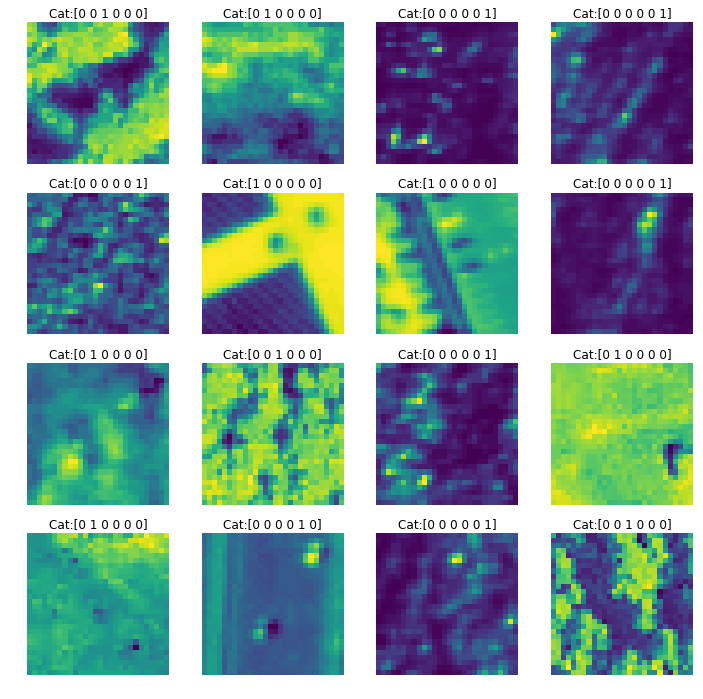

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

check_train_img_x = x_train[0:16]
check_train_img_y = y_train[0:16]

fig, m_axes = plt.subplots(4, check_train_img_x.shape[0]//4, figsize=(12,12))
for (x,y, c_ax) in zip(check_train_img_x, check_train_img_y, m_axes.flatten()):
    c_ax.imshow(x[:,:,3], interpolation='none')
    c_ax.axis('off')
    c_ax.set_title('Cat:{}'.format(y))

In [18]:
xtest,ytest=xtest.iloc[0:0],xtest.iloc[0:0]
xtest = pd.read_csv(tf.gfile.Open(path_a+testfiles[1]), header=None)
ytest = pd.read_csv(tf.gfile.Open(path_a+testfiles[0]), header=None)

x_test=xtest.values.reshape((xtest.shape[0], 28, 28, 4)).clip(0,255).astype(np.uint8)
y_test=ytest.values.astype(np.uint8)

In [ ]:
## Using tensorflow with BN to process
